In [1]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import mplfinance as mp
import pandas_ta as ta
import yfinance as yf
yf.pdr_override()

In [2]:
data = pdr.get_data_yahoo('AAPL', start='2017-01-01', end='2021-08-05')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.332472,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.301878,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.440716,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.746630,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.000784,134247600


In [3]:
data['Mean'] = data['Adj Close'].rolling(window=120).mean()
data['Std'] = data['Adj Close'].rolling(window=120).std()

In [5]:
data['Upper Band'] = data['Mean'] + (data['Std'] * 2)
data['Lower Band'] = data['Mean'] - (data['Std'] * 2)
data

,Open,High,Low,Close,Adj Close,Volume,Mean,Std,Upper Band,Lower Band
Date,,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.332472,115127600,NaN,NaN,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.301878,84472400,NaN,NaN,NaN,NaN
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.440716,88774400,NaN,NaN,NaN,NaN
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.746630,127007600,NaN,NaN,NaN,NaN
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.000784,134247600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-29,144.690002,146.550003,144.580002,145.639999,145.210190,56699500,130.251261,8.033397,146.318055,114.184466
2021-07-30,144.380005,146.330002,144.110001,145.860001,145.429535,70382000,130.327553,8.133923,146.595398,114.059707
2021-08-02,146.360001,146.949997,145.250000,145.520004,145.090546,62880000,130.408485,8.232325,146.873135,113.943835


In [6]:
df = data.loc[:,['Adj Close', 'Mean', 'Upper Band', 'Lower Band']]

In [7]:
df

,Adj Close,Mean,Upper Band,Lower Band
Date,,,,
2017-01-03,27.332472,NaN,NaN,NaN
2017-01-04,27.301878,NaN,NaN,NaN
2017-01-05,27.440716,NaN,NaN,NaN
2017-01-06,27.746630,NaN,NaN,NaN
2017-01-09,28.000784,NaN,NaN,NaN
...,...,...,...,...
2021-07-29,145.210190,130.251261,146.318055,114.184466
2021-07-30,145.429535,130.327553,146.595398,114.059707
2021-08-02,145.090546,130.408485,146.873135,113.943835


<AxesSubplot:xlabel='Date'>

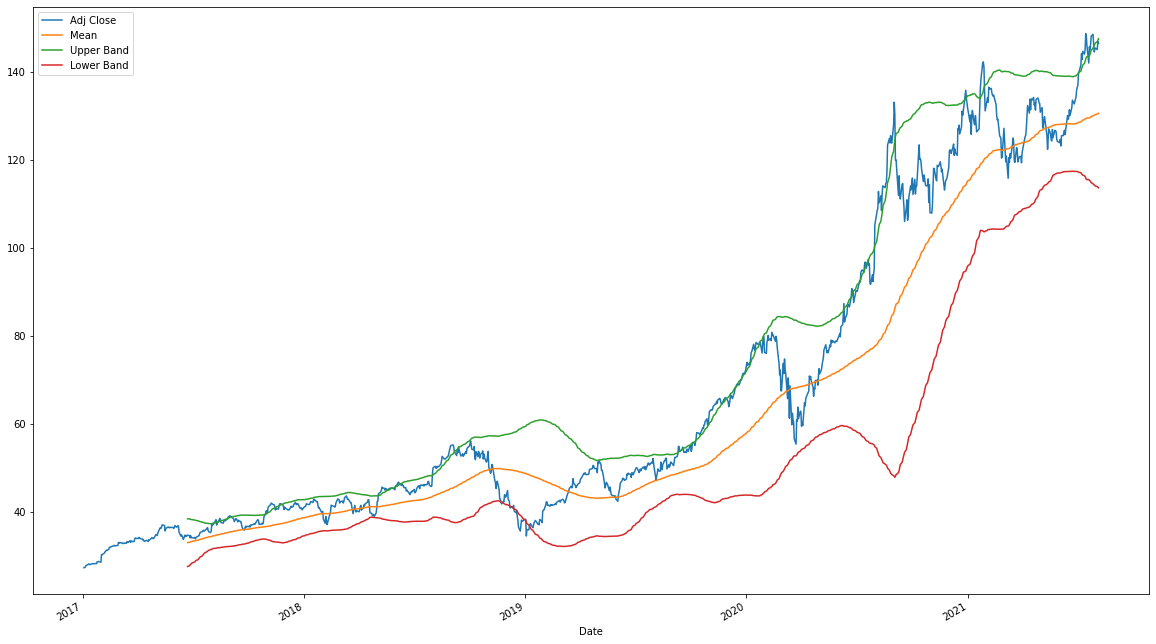

In [9]:
df.plot(figsize = (20, 12))

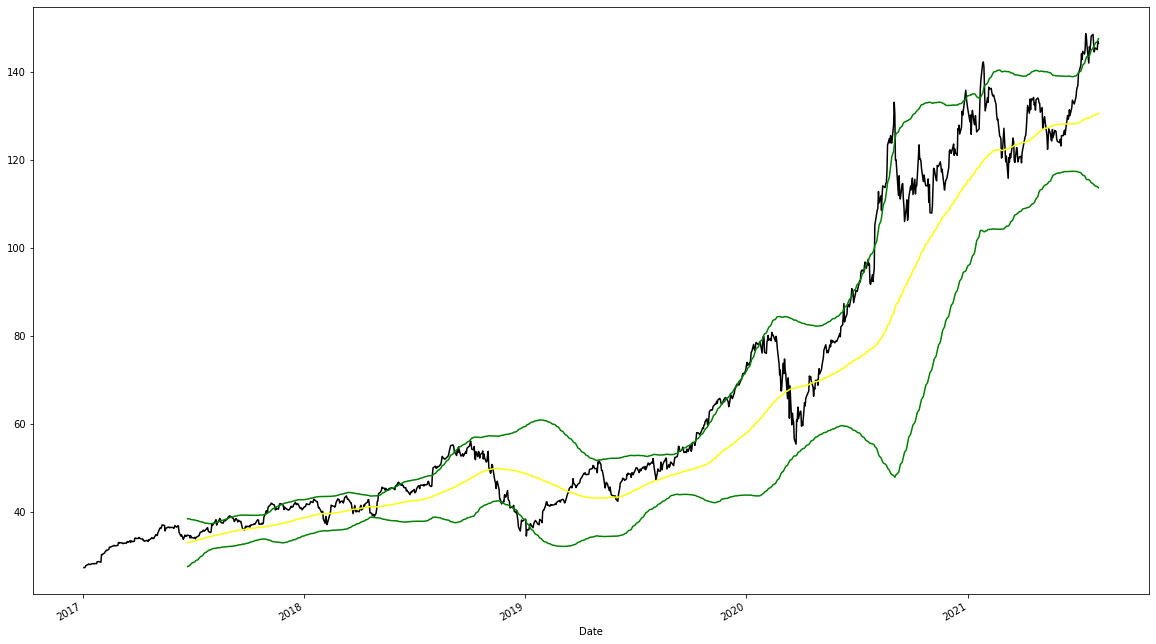

In [12]:
with pd.plotting.plot_params.use('x_compat', True):
    df['Adj Close'].plot(color='black', figsize=(20, 12))
    df['Mean'].plot(color='yellow')
    df['Upper Band'].plot(color='green')
    df['Lower Band'].plot(color='green')

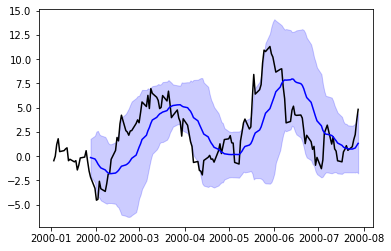

In [24]:
price = pd.Series(np.random.randn(150).cumsum(), index=pd.date_range("2000-01-01", periods=150, freq="B"), )

ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure()
plt.plot(price.index, price, "k")
plt.plot(ma.index, ma, "b")
plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color = "b", alpha = 0.2)

In [25]:
data2 = pdr.get_data_yahoo('AAPL', start='2017-01-01', end='2021-08-05')

[*********************100%***********************]  1 of 1 completed


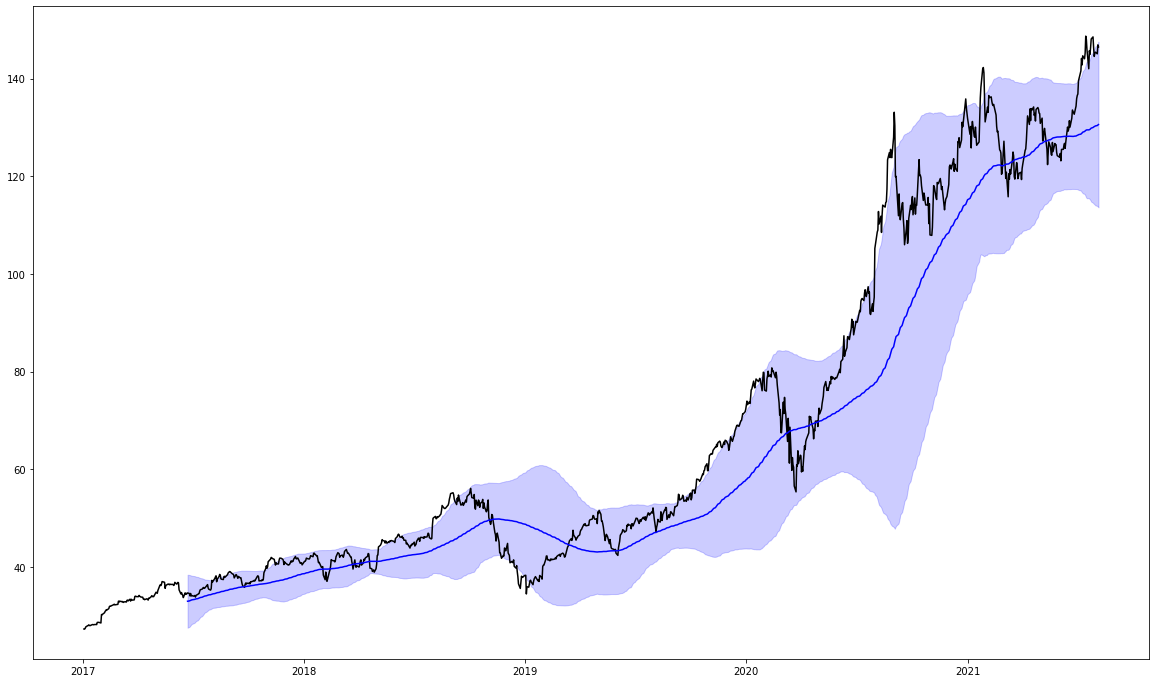

In [31]:
ma2 = data2['Adj Close'].rolling(120).mean()
std2 = data2['Adj Close'].rolling(120).std()

plt.figure(figsize=(20, 12))
plt.plot(data2.index, data2['Adj Close'], "k")
plt.plot(ma2.index, ma2, "b")
plt.fill_between(std2.index, ma2 - 2 * std2, ma2 + 2 * std2, color = "b", alpha = 0.2)